<a href="https://colab.research.google.com/github/Ismail-Amodu/Gold-Prices-Prediction-Using-Python-ML-project-03/blob/main/Gold_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Importing dependencies

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

DATA COLLECTION AND PROCESSING

In [2]:
# Loading the csv dataset to pandas dataframe
gold_data = pd.read_csv('/content/Gold.csv')

In [3]:
# Printing the first five rows of the dataframe
gold_data.head()

,Date,Close/Last,Volume,Open,High,Low
0,10/28/2022,1648.3,186519.0,1667.2,1670.9,1640.7
1,10/27/2022,1668.8,180599.0,1668.8,1674.8,1658.5
2,10/26/2022,1669.2,183453.0,1657.7,1679.4,1653.8
3,10/25/2022,1658.0,178706.0,1654.5,1666.8,1641.2
4,10/24/2022,1654.1,167448.0,1662.9,1675.5,1648.0


In [4]:
# Printing the last five rows of the dataframe
gold_data.tail()

,Date,Close/Last,Volume,Open,High,Low
2542,11/06/2012,1715.0,163585.0,1685.4,1720.9,1683.5
2543,11/05/2012,1683.2,109647.0,1676.7,1686.2,1672.5
2544,11/02/2012,1675.2,205777.0,1715.6,1717.2,1674.8
2545,11/01/2012,1715.5,105904.0,1720.4,1727.5,1715.1
2546,10/31/2012,1719.1,110928.0,1710.3,1726.6,1709.8


In [5]:
# Printing number of rows and columns
gold_data.shape

(2547, 6)

In [6]:
# Getting some basic informations about the data
gold_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2547 entries, 0 to 2546
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Date        2547 non-null   object 
 1   Close/Last  2547 non-null   float64
 2   Volume      2508 non-null   float64
 3   Open        2547 non-null   float64
 4   High        2547 non-null   float64
 5   Low         2547 non-null   float64
dtypes: float64(5), object(1)
memory usage: 119.5+ KB


In [7]:
# Checking the number of missing values
gold_data.isnull().sum()

Date           0
Close/Last     0
Volume        39
Open           0
High           0
Low            0
dtype: int64

In [8]:
# Getting the statistical measures of the data
gold_data.describe()

,Close/Last,Volume,Open,High,Low
count,2547.000000,2508.000000,2547.000000,2547.000000,2547.000000
mean,1437.557008,182067.668660,1437.743031,1447.083235,1427.891991
std,255.898467,97589.342619,256.239938,257.924158,253.641116
min,1049.600000,1.000000,1051.500000,1062.700000,1045.400000
25%,1243.450000,120901.000000,1243.000000,1251.000000,1235.250000
50%,1318.500000,168425.500000,1319.000000,1326.300000,1310.900000
75%,1698.100000,231754.000000,1701.450000,1715.300000,1684.000000
max,2069.400000,787217.000000,2076.400000,2082.100000,2049.000000


***Handling the missing values through imputation***

<ipython-input-9-32b9b7d502d0>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(gold_data.Volume)


<Axes: xlabel='Volume', ylabel='Density'>

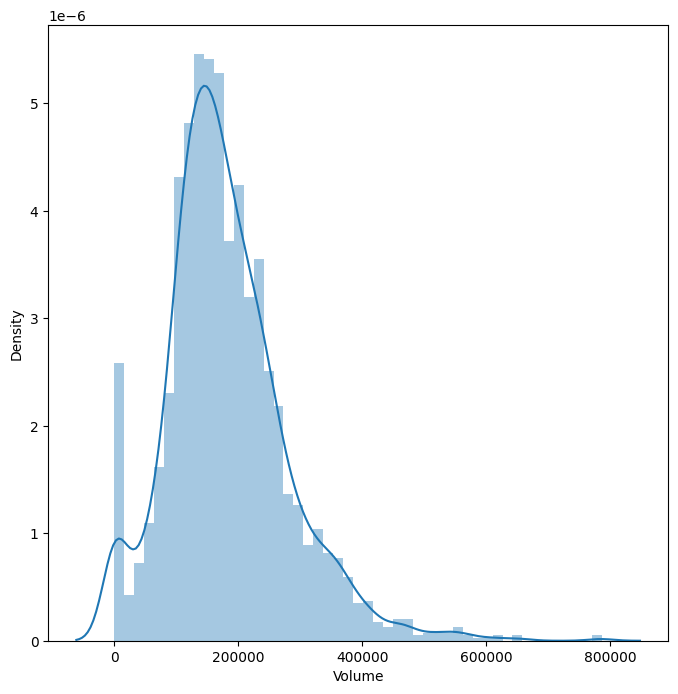

In [9]:
# Visualizing the distribution of data in the volume
fig, ax = plt.subplots(figsize=(8,8))
sns.distplot(gold_data.Volume)

In [10]:
# Replacing the missing values with the median value
gold_data['Volume'].fillna(gold_data['Volume'].median(), inplace=True)

In [11]:
# Checking if the missing values were handled
gold_data.isnull().sum()

Date          0
Close/Last    0
Volume        0
Open          0
High          0
Low           0
dtype: int64

Getting Correlation between features

In [12]:
gold_data_corr = gold_data.drop(['Date'], axis=1)

In [13]:
# Correlation
correlation = gold_data_corr.corr()

<Axes: >

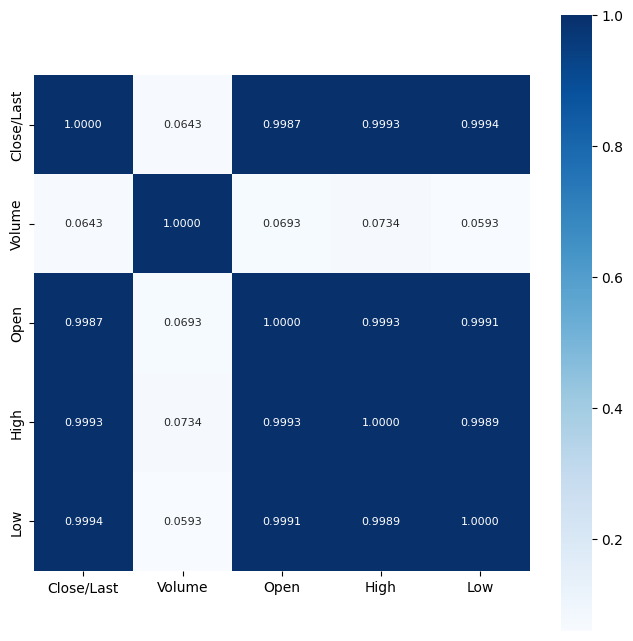

In [14]:
# Constructing a heatmap to understand the correlation
plt.figure(figsize = (8, 8))
sns.heatmap(correlation, cbar=True, square=True, fmt='.4f', annot=True, annot_kws={'size':8}, cmap='Blues')

In [15]:
# correlation values of GLD
print(correlation['Close/Last'])

Close/Last    1.000000
Volume        0.064350
Open          0.998703
High          0.999334
Low           0.999420
Name: Close/Last, dtype: float64


<ipython-input-16-f4e11b9231c7>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(gold_data['Close/Last'], color='blue')


<Axes: xlabel='Close/Last', ylabel='Density'>

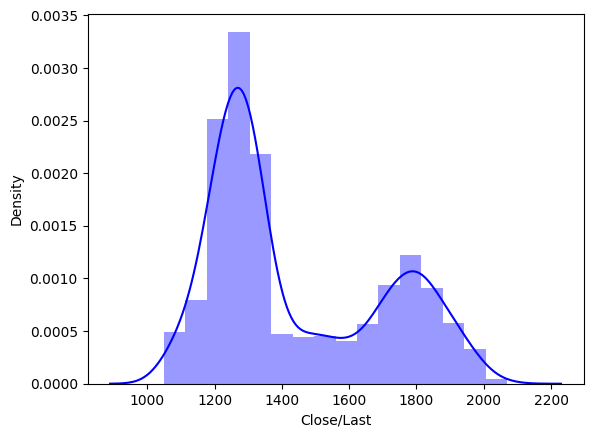

In [16]:
# Checking the distribution of the GLD price
sns.distplot(gold_data['Close/Last'], color='blue')

***Splitting features and target***

In [17]:
# Splitting features and target
X = gold_data.drop(['Date', 'Close/Last'], axis=1)
Y = gold_data['Close/Last']

In [18]:
print(X)

        Volume    Open    High     Low
0     186519.0  1667.2  1670.9  1640.7
1     180599.0  1668.8  1674.8  1658.5
2     183453.0  1657.7  1679.4  1653.8
3     178706.0  1654.5  1666.8  1641.2
4     167448.0  1662.9  1675.5  1648.0
...        ...     ...     ...     ...
2542  163585.0  1685.4  1720.9  1683.5
2543  109647.0  1676.7  1686.2  1672.5
2544  205777.0  1715.6  1717.2  1674.8
2545  105904.0  1720.4  1727.5  1715.1
2546  110928.0  1710.3  1726.6  1709.8

[2547 rows x 4 columns]


In [19]:
print(Y)

0       1648.3
1       1668.8
2       1669.2
3       1658.0
4       1654.1
         ...  
2542    1715.0
2543    1683.2
2544    1675.2
2545    1715.5
2546    1719.1
Name: Close/Last, Length: 2547, dtype: float64


***Splitting dataset into training and test data***

In [20]:
# Splitting dataset into training and test data
X_train, X_test, Y_train, Y_test  = train_test_split(X, Y, test_size=0.2, random_state=5)

***MODEL TRAINING: Random Forest Regressor***



In [21]:
# Loading the random forest regressor
regressor = RandomForestRegressor(n_estimators=100)

# Training the model
regressor.fit(X_train, Y_train)

RandomForestRegressor()

**MODEL EVALUATION**

R squared error :  0.9990808144576779


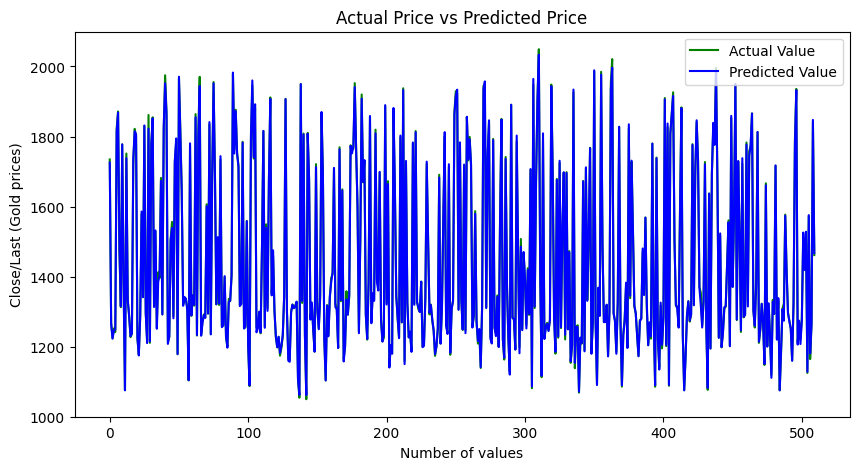

In [22]:
# Prediction on test data
test_data_prediction = regressor.predict(X_test)

# R squared error
error_score = metrics.r2_score(Y_test, test_data_prediction)
print("R squared error : ", error_score)

# Comparing the actual and predicted values in a plot
Y_test = list(Y_test)

plt.figure(figsize=(10, 5))

plt.plot(Y_test, color='green', label='Actual Value')
plt.plot(test_data_prediction, color='blue', label='Predicted Value')
plt.title('Actual Price vs Predicted Price')
plt.xlabel('Number of values')
plt.ylabel('Close/Last (Gold prices)')
plt.legend()
plt.show()


**BUILDING A PREDICTIVE SYSTEM**

In [25]:
# Inputting new data to be predicted
input_data = (43110,1872.2,1887.2,1866.2)

# Changing input data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshaping the data as we are prediciting the label for only one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1, -1)

prediction = regressor.predict(input_data_reshaped)
print("The gold price will be :", prediction)

The gold price will be : [1880.642]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
